# Lab02 - Differential GNSS and RTK

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import contextily as ctx

# Comparing GNSS points across groups

In [2]:
gnss_lab01_pts = pd.read_csv('../data/lab01/Anonymous_GNSS_Lab01_Responses.csv')

# build geopandas points for OPUS with z values from first three columns
opus_geometry = gpd.points_from_xy(gnss_lab01_pts['OPUS_LON'], gnss_lab01_pts['OPUS_LAT'], gnss_lab01_pts['OPUS_ELHGT'])
gnss_lab01_opus_pts = gpd.GeoDataFrame(geometry=opus_geometry, crs='EPSG:4326')
# add a columns titled "type" with value "OPUS"
gnss_lab01_opus_pts['type'] = 'OPUS'

# build geopandas points for CSRS with z values from first three columns
csrs_geometry = gpd.points_from_xy(gnss_lab01_pts['CSRS_LON'], gnss_lab01_pts['CSRS_LAT'], gnss_lab01_pts['CSRS_ELHGT'])
gnss_lab01_csrs_pts = gpd.GeoDataFrame(geometry=csrs_geometry, crs='EPSG:4326')
# add a column titled "type" with value "CSRS"
gnss_lab01_csrs_pts['type'] = 'CSRS'

# build geopandas points for PHONE with z values from last three columns
phone_geometry = gpd.points_from_xy(gnss_lab01_pts['PHONE_LON'], gnss_lab01_pts['PHONE_LAT'], gnss_lab01_pts['PHONE_ORTHGT'])
gnss_lab01_phone_pts = gpd.GeoDataFrame(geometry=phone_geometry, crs='EPSG:4326')
# add a column titled "type" with value "PHONE"
gnss_lab01_phone_pts['type'] = 'PHONE'

# combine gnss_lab01_opus_pts, gnss_lab01_csrs_pts, and gnss_lab01_phone_pts into a single geopandas dataframe
gnss_lab01_all_pts = pd.concat([gnss_lab01_opus_pts, gnss_lab01_csrs_pts, gnss_lab01_phone_pts])

### Update the CRS to UTM Zone 10 N

In [3]:
# update crs to utm zone 10n
gnss_lab01_all_pts_utm = gnss_lab01_all_pts.to_crs('EPSG:32610')


(array([551000., 552000., 553000., 554000.]),
 [Text(551000.0, 0, '551000'),
  Text(552000.0, 0, '552000'),
  Text(553000.0, 0, '553000'),
  Text(554000.0, 0, '554000')])

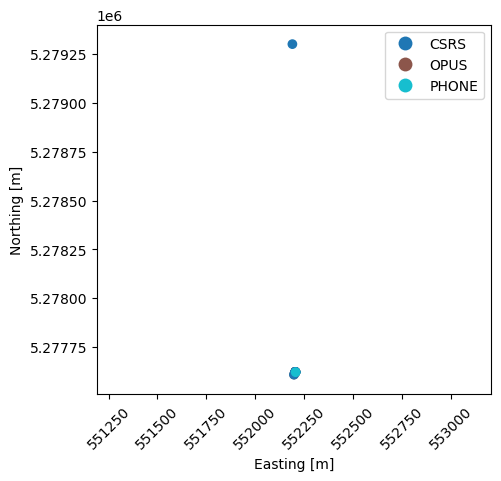

In [4]:
# update crs to utm zone 10n
gnss_lab01_all_pts_utm = gnss_lab01_all_pts.to_crs('EPSG:32610')

# create a plot of the x,y points with axes units of meters
fig, ax = plt.subplots()
gnss_lab01_all_pts_utm.plot(ax=ax, column='type', legend=True)
# add x,y units 
ax.set_xlabel('Easting [m]')
ax.set_ylabel('Northing [m]')
# set xlim to 10 meters outside the extremes of the data
ax.set_xlim(gnss_lab01_all_pts_utm.total_bounds[0]-1000, gnss_lab01_all_pts_utm.total_bounds[2]+1000)
# set ylim to 10 meters outside the extremes of the data
ax.set_ylim(gnss_lab01_all_pts_utm.total_bounds[1]-100, gnss_lab01_all_pts_utm.total_bounds[3]+100)
# rotate x axis labels
plt.xticks(rotation=45)

In [5]:
print('x mean, median mode:')
# print the mean of the x geometry points
print(gnss_lab01_all_pts_utm.geometry.x.mean())
# print the median of the x geometry points
print(gnss_lab01_all_pts_utm.geometry.x.median())
# print the mode of the x geometry points
print(gnss_lab01_all_pts_utm.geometry.x.mode()[0])

print('y mean, median, mode:')
# print the mean of the y geometry points
print(gnss_lab01_all_pts_utm.geometry.y.mean())
# print the median of the y geometry points
print(gnss_lab01_all_pts_utm.geometry.y.median())
# print the mode of the y geometry points
print(gnss_lab01_all_pts_utm.geometry.y.mode()[0])

print('z mean, median, mode:')
# print the mean of the z geometry points
print(gnss_lab01_all_pts_utm[gnss_lab01_all_pts_utm['type']!='PHONE'].geometry.z.mean())
# print the median of the z geometry points
print(gnss_lab01_all_pts_utm[gnss_lab01_all_pts_utm['type']!='PHONE'].geometry.z.median())
# print the mode of the z geometry points
print(gnss_lab01_all_pts_utm[gnss_lab01_all_pts_utm['type']!='PHONE'].geometry.z.mode()[0])


x mean, median mode:
552204.5291947742
552205.4920185722
552205.4692598674
y mean, median, mode:
5277689.082937993
5277623.118805279
5277623.118805279
z mean, median, mode:
-1.101375
-1.142
-1.232


# Map survey points from Lab02

In [6]:
lab02_pts = gpd.read_file('../data/lab02/Points.shp')

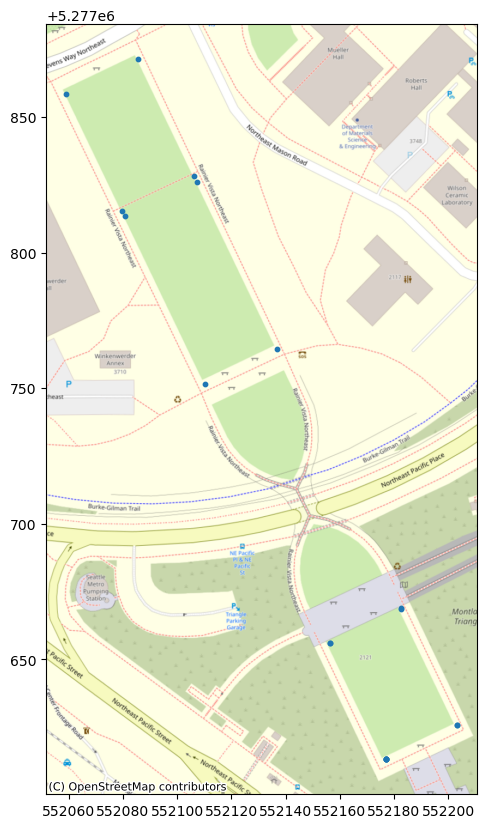

In [7]:
# create a plot of the x,y points with axes units of meters
fig, ax = plt.subplots(figsize=(10,10))
lab02_pts.plot(ax=ax, markersize=10)
# add a basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom='auto', crs='EPSG:32610')

In [8]:
lab2_track = pd.read_csv('../data/lab02/TACOrover_solution_20231009195919.LLH', delimiter='\s+', header=None) 

In [9]:
lab2_track = lab2_track.rename(columns={
    2:'lat',
    3:'lon',
    4:'h'
})

In [10]:
pts_from_xy = gpd.points_from_xy(lab2_track['lon'], lab2_track['lat'], lab2_track['h'])
lab2_track_gdf = gpd.GeoDataFrame(geometry=pts_from_xy, crs='EPSG:4326')
lab2_track_gdf_utm = lab2_track_gdf.to_crs('EPSG:32610')
# save as geojason
lab2_track_gdf_utm.to_file('../data/lab02/lab2_track_gdf_utm.geojson', driver='GeoJSON')
lab02_pts.to_file('../data/lab02/lab02_pts.geojson', driver='GeoJSON')
gnss_lab01_all_pts_utm.to_file('../data/lab02/gnss_lab01_all_pts_utm.geojson', driver='GeoJSON')

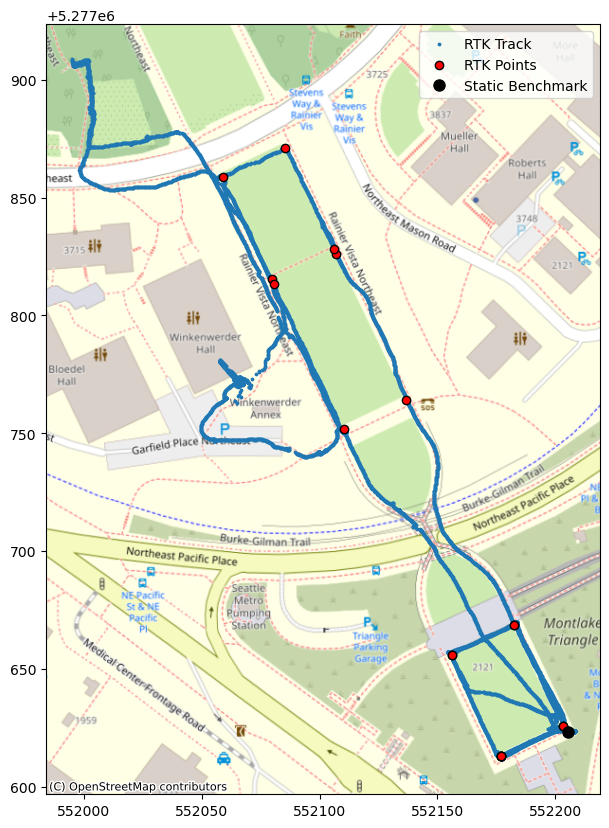

In [11]:
# plot track with basemap
fig, ax = plt.subplots(figsize=(10,10))
lab2_track_gdf_utm.plot(ax=ax, markersize=3,label='RTK Track')
lab02_pts.plot(ax=ax, color='red',
               ec='k',
               label='RTK Points')
# plot static benchmark point
ax.plot(gnss_lab01_all_pts_utm.geometry.x.median(), 
        gnss_lab01_all_pts_utm.geometry.y.median(), 
        'o', 
        color='black', 
        markersize=8,
        label='Static Benchmark')
# add a basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom='auto', crs='EPSG:32610')
# add legend
ax.legend()

In [12]:
lora_montlake_pts = lab02_pts.loc[3:6]
ntrip_montlake_pts = lab02_pts.iloc[-4:]

In [13]:
lora_montlake_pts[['Easting','Northing']].iloc[1].values

array(['552203.390', '5277625.733'], dtype=object)

In [14]:
print('SW Corner Easting/Northing Difference (cm):')
print(100*(lora_montlake_pts[['Easting','Northing']].iloc[0].values.astype(float) - ntrip_montlake_pts[['Easting','Northing']].iloc[-1].values.astype(float)))

print('SE Corner Easting/Northing Difference (cm):')
print(100*(lora_montlake_pts[['Easting','Northing']].iloc[1].values.astype(float) - ntrip_montlake_pts[['Easting','Northing']].iloc[0].values.astype(float)))

print('NE Corner Easting/Northing Difference (cm):')
print(100*(lora_montlake_pts[['Easting','Northing']].iloc[2].values.astype(float) - ntrip_montlake_pts[['Easting','Northing']].iloc[1].values.astype(float)))

print('NW Corner Easting/Northing Difference (cm):')
print(100*(lora_montlake_pts[['Easting','Northing']].iloc[3].values.astype(float) - ntrip_montlake_pts[['Easting','Northing']].iloc[2].values.astype(float)))

SW Corner Easting/Northing Difference (cm):
[0.7        0.30000005]
SE Corner Easting/Northing Difference (cm):
[-1.         -0.29999996]
NE Corner Easting/Northing Difference (cm):
[-3.1        -5.30000003]
NW Corner Easting/Northing Difference (cm):
[ 0.  -3.4]
